In [ ]:
!pip install langchain langgraph langchain-openai langchain-community langchain-tavily langchain_groq langchain_core

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")
os.environ['GROQ_API_KEY'] = userdata.get("GROQ_API_KEY")

In [ ]:
from langgraph.graph import StateGraph , START , END
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

In [ ]:
llm_openai_model = ChatOpenAI(model_name="gpt-3.5-turbo")
llm_groq_model = ChatGroq(model_name="llama-3.1-8b-instant")

In [ ]:
class jokeState (TypedDict):
  topic : str
  joke : str
  explanation : str

In [ ]:
def generate_joke (state : jokeState) :
  prompt = f"Generate the joke on the given provided topic {state['topic']}"
  response = llm_openai_model.invoke(prompt)

  return {'joke' : response}

In [ ]:
def generate_explanation (state : jokeState) :
  prompt = f"Generate the explanation of the joke {state['joke']}"

  response = llm_openai_model.invoke(prompt)

  return {'explanation' : response}

In [ ]:
graph = StateGraph(jokeState)

In [ ]:
graph.add_node("generate_joke" , generate_joke)
graph.add_node("generate_explanation" , generate_explanation)


graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

In [ ]:
checkpointer = InMemorySaver()

In [ ]:
workflow = graph.compile(checkpointer=checkpointer)

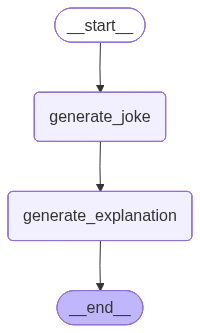

In [ ]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
config1 = {'configurable' : {"thread_id" : "1"}}
workflow.invoke({"topic" : 'Football'} , config = config1)

{'topic': 'Football',
 'joke': AIMessage(content='Why did the football coach buy a new clipboard?\n\nBecause he heard it was a great way to draw up a game plan!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 16, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAvyvtef3BpElSS3wx50vkQ2SxzwL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6fdf010f-740c-4431-8d5a-b95acabd28f9-0', usage_metadata={'input_tokens': 16, 'output_tokens': 25, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'explanation': AIMessage(content="The joke about the football coach buyi

In [ ]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Football', 'joke': AIMessage(content='Why did the football coach buy a new clipboard?\n\nBecause he heard it was a great way to draw up a game plan!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 16, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAvyvtef3BpElSS3wx50vkQ2SxzwL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6fdf010f-740c-4431-8d5a-b95acabd28f9-0', usage_metadata={'input_tokens': 16, 'output_tokens': 25, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content="The joke about the 

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Football', 'joke': AIMessage(content='Why did the football coach buy a new clipboard?\n\nBecause he heard it was a great way to draw up a game plan!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 16, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAvyvtef3BpElSS3wx50vkQ2SxzwL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6fdf010f-740c-4431-8d5a-b95acabd28f9-0', usage_metadata={'input_tokens': 16, 'output_tokens': 25, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content="The joke about the

In [ ]:
config2 = {'configurable' : {'thread_id' : '2'}}
workflow.invoke({'topic' : 'Cricket'} , config = config2)

{'topic': 'Cricket',
 'joke': AIMessage(content='Why did the cricket team go to the bank? \nBecause they wanted to open a savings account!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 16, 'total_tokens': 36, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAwHFthCLwjpVtxHMuuMiBVsomxZq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bf222610-173b-44a2-b48e-249024e6dd39-0', usage_metadata={'input_tokens': 16, 'output_tokens': 20, 'total_tokens': 36, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'explanation': AIMessage(content='The joke here plays on the word "cricket" which can refer to

In [ ]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Cricket', 'joke': AIMessage(content='Why did the cricket team go to the bank? \nBecause they wanted to open a savings account!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 16, 'total_tokens': 36, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAwHFthCLwjpVtxHMuuMiBVsomxZq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bf222610-173b-44a2-b48e-249024e6dd39-0', usage_metadata={'input_tokens': 16, 'output_tokens': 20, 'total_tokens': 36, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content='The joke here plays on the word "cricket"

In [ ]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Football', 'joke': AIMessage(content='Why did the football coach buy a new clipboard?\n\nBecause he heard it was a great way to draw up a game plan!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 16, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAvyvtef3BpElSS3wx50vkQ2SxzwL', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6fdf010f-740c-4431-8d5a-b95acabd28f9-0', usage_metadata={'input_tokens': 16, 'output_tokens': 25, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content="The joke about the 

# Time Travel

In [ ]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0871da-ca5b-6f5f-8000-6b26c8eaefa4"}})

StateSnapshot(values={'topic': 'Football'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0871da-ca5b-6f5f-8000-6b26c8eaefa4'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-01T10:23:16.882984+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0871da-ca57-6e2c-bfff-b05e54d2c4b3'}}, tasks=(PregelTask(id='79528a94-bad1-4ae5-eeff-0713b7317b48', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': AIMessage(content='Why did the football coach buy a new clipboard?\n\nBecause he heard it was a great way to draw up a game plan!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 16, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_t

In [ ]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0871da-ca5b-6f5f-8000-6b26c8eaefa4"}})

{'topic': 'Football',
 'joke': AIMessage(content='Why did the football coach go to the bank?\n\nTo get his quarterback!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 16, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAx2ruUkVVsDTYWsfC0JUsD3GhUIj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bf7f8f97-d12a-4b42-9a3c-908ca35e8b56-0', usage_metadata={'input_tokens': 16, 'output_tokens': 15, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 'explanation': AIMessage(content='The joke "Why did the football coach go to the bank? To get his quarterback!" i

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Football', 'joke': AIMessage(content='Why did the football coach go to the bank?\n\nTo get his quarterback!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 16, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CAx2ruUkVVsDTYWsfC0JUsD3GhUIj', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bf7f8f97-d12a-4b42-9a3c-908ca35e8b56-0', usage_metadata={'input_tokens': 16, 'output_tokens': 15, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), 'explanation': AIMessage(content='The joke "Why did the football coach go to the bank? To get

# Fault Tolerance

In [ ]:

from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [ ]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [ ]:
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": "done"}

In [ ]:
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:

try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")


▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [ ]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f087232-aeb0-61cf-8004-28e3e36bb87c'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2025-09-01T11:02:36.213478+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f087232-aead-6fa2-8003-09b4ac39fb68'}}, tasks=(PregelTask(id='a1bf98c8-ea45-7c96-3a0c-49c70e5659f3', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [ ]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f087239-f24e-640a-8006-f8439db9f728'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-09-01T11:05:51.208534+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f087239-f24c-616a-8005-9f61a2d9f5ce'}}, tasks=(), interrupts=())